In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
#for deep learning model
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [11]:
# Import Dataset and Split
inputs = pd.read_csv("C:\\Users\\zackf\\Repos\\BankOfEnglandInnovaitonCompetition\\JupyterNotebook\\inputs.csv")
inputs.shape
inputs = inputs.reset_index(drop=True)
inputs.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/zackf/Repos/BankOfEnglandInnovaitonCompetition/JupyterNotebook/inputs.csv'

In [ ]:
# Creating test and train sets
train_set = inputs[:250].values
test_set = inputs[250:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (250, 7)
Test size: (58, 7)


In [ ]:
# Scale Train Dataset
sc = MinMaxScaler()
train_set_scaled = sc.fit_transform(train_set)

In [ ]:
# Create Train Data
x_train = []
y_train = []
for i in range(12,250):
    x_train.append(train_set_scaled[i-12:i].flatten())
    y_train.append(train_set_scaled[i,1])
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(238, 84, 1)

In [ ]:
# Create Model
reg = Sequential()
reg.add(LSTM(units = 50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units = 50,return_sequences=True))
reg.add(Dropout(0.2))
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))
reg.add(Dense(units=1))
reg.compile(optimizer = 'adam',loss='mean_squared_error')
reg.fit(x_train,y_train, epochs=100, batch_size =1,verbose=2)

Epoch 1/100
238/238 - 18s - loss: 0.0399 - 18s/epoch - 78ms/step
Epoch 2/100
238/238 - 16s - loss: 0.0306 - 16s/epoch - 66ms/step
Epoch 3/100
238/238 - 15s - loss: 0.0293 - 15s/epoch - 64ms/step
Epoch 4/100
238/238 - 15s - loss: 0.0245 - 15s/epoch - 61ms/step
Epoch 5/100
238/238 - 16s - loss: 0.0237 - 16s/epoch - 66ms/step
Epoch 6/100
238/238 - 17s - loss: 0.0228 - 17s/epoch - 71ms/step
Epoch 7/100
238/238 - 23s - loss: 0.0239 - 23s/epoch - 98ms/step
Epoch 8/100
238/238 - 22s - loss: 0.0230 - 22s/epoch - 91ms/step
Epoch 9/100
238/238 - 19s - loss: 0.0192 - 19s/epoch - 81ms/step
Epoch 10/100
238/238 - 16s - loss: 0.0208 - 16s/epoch - 69ms/step
Epoch 11/100
238/238 - 15s - loss: 0.0188 - 15s/epoch - 63ms/step
Epoch 12/100
238/238 - 15s - loss: 0.0195 - 15s/epoch - 63ms/step
Epoch 13/100
238/238 - 15s - loss: 0.0185 - 15s/epoch - 63ms/step
Epoch 14/100
238/238 - 14s - loss: 0.0209 - 14s/epoch - 59ms/step
Epoch 15/100
238/238 - 14s - loss: 0.0174 - 14s/epoch - 59ms/step
Epoch 16/100
238/23

In [ ]:
# Scale Test Dataset
input = inputs[len(inputs)-len(test_set)-12:].values
input.shape
input = sc.transform(input)

In [ ]:
# Create Test Data
x_test = []
for i in range(12,70):
    x_test.append(input[i-12:i].flatten())
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

2/2 [==============================] - 2s 45ms/step


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


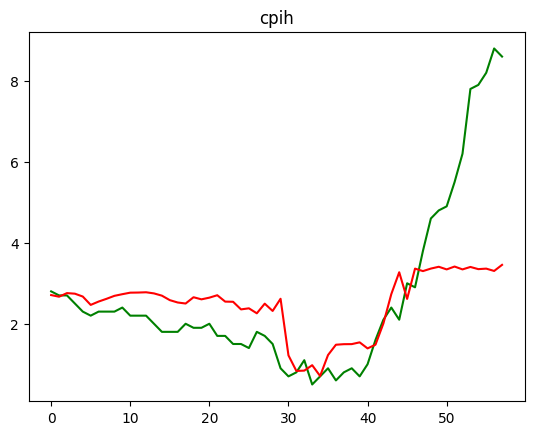

In [ ]:
# Test and Readjust Test Set and Predictions
pred = reg.predict(x_test)

padded_pred = []
for i in range(0,len(pred)):
    padded_pred.append([0,pred[i],0,0,0,0,0])
    
padded_pred = sc.inverse_transform(padded_pred)

new_pred = []
for i in range(0,len(pred)):
    new_pred.append(padded_pred[i][1])
    
new_test_set = []
for i in range(0,len(pred)):
    new_test_set.append(test_set[i][1])
    
# Plot Test Data and Predicted Data

plt.plot(new_test_set,color='green')
plt.plot(new_pred,color='red')
plt.title('cpih')
plt.show()

8/8 [==============================] - 0s 33ms/step


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


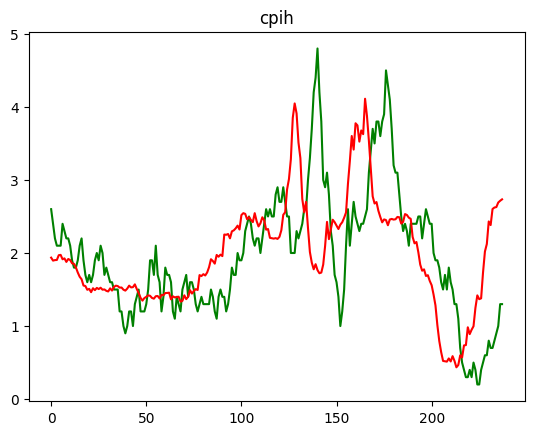

In [ ]:
pred = reg.predict(x_train)

padded_pred = []
for i in range(0,len(pred)):
    padded_pred.append([0,pred[i],0,0,0,0,0])
    
padded_pred = sc.inverse_transform(padded_pred)

new_pred = []
for i in range(0,len(pred)):
    new_pred.append(padded_pred[i][1])
    
new_test_set = []
for i in range(0,len(pred)):
    new_test_set.append(train_set[i][1])

plt.plot(new_test_set,color='green')
plt.plot(new_pred,color='red')
plt.title('cpih')
plt.show()